In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (1).zip")

In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.shape

(962, 2)

EXPLORING CATEGORIES


In [10]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

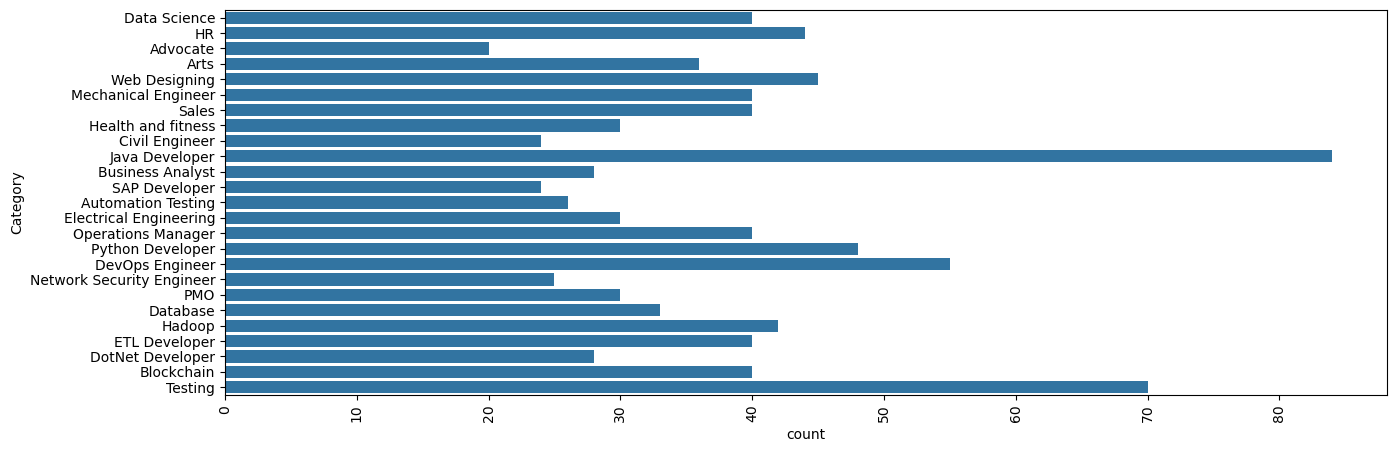

In [11]:
plt.figure(figsize =(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x261709fda30>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

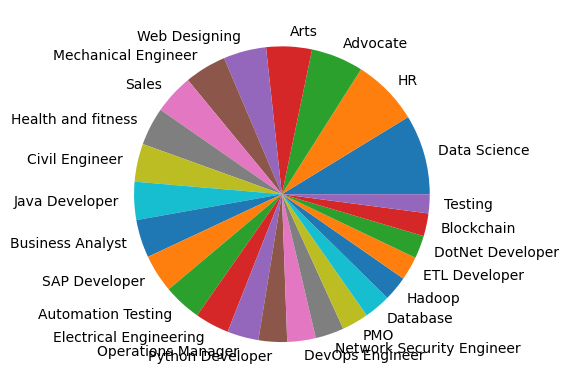

In [18]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.pie(counts,labels=labels)

DISTRIBUTION OF CATEGORIES

In [20]:
df['Category'][0]

'Data Science'

In [21]:
df['Resume'][90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

Cleaning DATA:
1.urls
2.hastags
3.mentions
4.special letters
5.punctuations

In [25]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\\S+\\s*', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\\S+', ' ', cleanText)
    cleanText = re.sub('@\\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?[\\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\\s+', ' ', cleanText)
    return cleanText

In [30]:
cleanResume("helooo ######  python hiii   http://shbhd  and @gmail.com")

'helooo python hiii and '

In [32]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [33]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [36]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


WORDS INTO CATEGORICAL VALUE

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [41]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [43]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [45]:
#['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
   #    'Mechanical Engineer', 'Sales', 'Health and fitness',
    #   'Civil Engineer', 'Java Developer', 'Business Analyst',
     #  'SAP Developer', 'Automation Testing', 'Electrical Engineering',
      # 'Operations Manager', 'Python Developer', 'DevOps Engineer',
       #'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       #'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

VECTORIZATION

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create object
tfidf = TfidfVectorizer(stop_words='english')

# fit on your column (make sure the column name matches exactly in df)
tfidf.fit(df['Resume'])

# transform
required_text = tfidf.transform(df['Resume'])


In [49]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [50]:
required_text

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

SPLITTING

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split( required_text , df['Category'], test_size=0.2, random_state=42)

In [59]:
X_train.shape

(769, 7351)

In [61]:
X_test.shape

(193, 7351)

TRAIN THE MODEL AND PRINT THE CLASSIFICATION REPORT:


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


PREDICTION SYSYTEM

In [66]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf , open('clf.pkl' , 'wb' ))

In [69]:
myresume="John DoeEmail: johndoe@example.comPhone: +91-9876543210 | LinkedIn: linkedin.com/in/johndoeProfessional Summary:Highly motivated and detail-oriented Software Engineer with 5+ years of experience in full-stack development, specializing in Python, JavaScript, and cloud-based applications. Adept at designing scalable web applications, automating processes, and leveraging data-driven insights to drive business solutions. Excellent communication skills and a proven track record of collaborating with cross-functional teams to deliver projects on time and within budget.Work Experience:Software Engineer | Tech Solutions Pvt. Ltd. | Jan 2020 – PresentDeveloped and maintained multiple web applications using Python, Django, React, and PostgreSQL.Implemented RESTful APIs and integrated third-party services to improve application functionality.Reduced server response time by 30% through code optimization and database indexing.Led a team of 4 developers for a client-facing project, ensuring timely delivery and high-quality code.Junior Software Developer | Innovatech Systems | Jun 2017 – Dec 2019Assisted in designing and developing scalable backend systems using Node.js and MongoDB.Collaborated with front-end developers to implement responsive UI/UX designs.Created automated scripts to streamline repetitive tasks, improving team efficiency by 20%.Participated in code reviews and contributed to the company’s best practices documentation.Education:Bachelor of Technology in Computer Science | XYZ University | 2013 – 2017Certifications: AWS Certified Solutions Architect, Python for Data ScienceSkills:Programming: Python, JavaScript, C++Web Development: Django, Flask, React, HTML, CSSDatabases: MySQL, PostgreSQL, MongoDBTools & Platforms: Git, Docker, AWS, JenkinsSoft Skills: Team Leadership, Communication, Problem Solving:Resume Analyzer: Developed a Python-based tool to parse resumes and match candidate profiles with job descriptions using NLP and machine learning techniques.E-commerce Platform: Built a full-stack web application for an online store, integrating payment gateways and real-time order tracking.Data Visualization Dashboard: Created interactive dashboards using Python and Tableau to track key performance metrics for business clients.Achievements:Employee of the Month – Tech Solutions Pvt. Ltd., March 2021Winner – Hackathon 2019 for developing an AI-based recommendation system"

In [73]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    6: "Database Engineer"   # <-- added missing category
}

# Safe lookup with fallback
print("Prediction ID:", prediction_id)
print("Predicted Category:", category_mapping.get(prediction_id, "Unknown Category"))




Prediction ID: 6
Predicted Category: Database Engineer
